In [160]:
%pwd

'/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/sales_data_analysis'

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(0)

# 과제(7/7)

## 아래 가이드에 따라서 고객 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

거래 번호
- id : 1 ~ 10000번 일련번호 - 개시 후 1만 건의 거래가 있었고 걍 거기에 넘버링한 거라고 이해해보자

고객별 속성 데이터
- cusno : 고객번호 1000개 랜덤
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성
    
거래 데이터
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0

거래 번호
- id : 1 ~ 10000번 일련번호 - 개시 후 1만 건의 거래가 있었고 걍 거기에 넘버링한 거라고 이해해보자

고객별 속성 데이터
- cusno : 고객번호 1000개 랜덤
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성
    
거래 데이터
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 1000개 생성
- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성
- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성
- price_21 : 1000 ~ 50000 사이 실수 난수 생성
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성
- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0

## 수행 과제
1. 세부 분류코드 작성:
    - 고가제품: 
    - 중가제품:  
    - 저가제품: 영화/도서, 식자재, 
2. 분류코드별 가격 다시 책정
3. 21-20년도 총 구매 가격 차이 변수 만들기

### Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

#### 고객 속성(id, 성별, 연령, 거주지역) 데이터 만들기

In [162]:
# 고객별 속성 데이터
cusno_c = np.arange(10000, 11000)
# cusno = random.shuffle(cusno)
cusno_c = pd.Series(cusno_c)

gender_c = np.random.randint(0, 2, size=(1000))
gender_c = pd.Series(gender_c)

age_c = np.random.randint(12, 81, size=(1000))
age_c = pd.Series(age_c)

region_c = np.random.randint(0, 10, size=(1000))
region_c = pd.Series(region_c)

index_c = np.arange(0, 1000)
index_c = pd.Series(index_c)

# 회원 등급
grade_20_c = []
grade_20_c = pd.Series(grade_20_c)

grade_21_c = []
grade_21_c = pd.Series(grade_21_c)

# ARPPU: Average Revenue Per Paying User : 구매 회당 평균 결제액
ARPPU_20_c = np.random.randint(1000, 50001, size=(1000))
ARPPU_20_c = pd.Series(ARPPU_20_c)
ARPPU_21_c = np.random.randint(1000, 50001, size=(1000))
ARPPU_21_c = pd.Series(ARPPU_21_c)

# AVC: Annual Visits by Customer : 고객별 연간 방문 획수
AVC_20_c = np.random.randint(1, 366, size=(1000))
AVC_20_c = pd.Series(AVC_20_c)
AVC_21_c = np.random.randint(1, 366, size=(1000))
AVC_21_c = pd.Series(AVC_21_c)

# ASC: Annual Sale by Customer : 고객별 연간 매출액
ASC_20_c = (ARPPU_20_c * AVC_20_c)
ASC_20_c = pd.Series(ASC_20_c)
ASC_21_c = (ARPPU_21_c * AVC_20_c)
ASC_21_c = pd.Series(ASC_21_c)
customer = pd.concat([index_c, cusno_c, gender_c, age_c, region_c, grade_20_c,
                     grade_21_c, ARPPU_20_c, ARPPU_21_c, AVC_20_c, AVC_21_c, ASC_20_c, ASC_21_c], axis=1)
customer.columns = ['index_c', 'cusno_c', 'gender_c', 'age_c', 'region_c', 'grade_20_c',
                    'grade_21_c', 'ARPPU_20_c', 'ARPPU_21_c', 'AVC_20_c', 'AVC_21_c', 'ASC_20_c', 'ASC_21_c']
customer.set_index('index_c', drop=True)
customer.head()

,index_c,cusno_c,gender_c,age_c,region_c,grade_20_c,grade_21_c,ARPPU_20_c,ARPPU_21_c,AVC_20_c,AVC_21_c,ASC_20_c,ASC_21_c
0,0,10000,0,51,1,NaN,NaN,37411,21821,147,92,5499417,3207687
1,1,10001,1,47,9,NaN,NaN,49608,36218,215,142,10665720,7786870
2,2,10002,1,64,8,NaN,NaN,41065,44509,263,290,10800095,11705867
3,3,10003,1,51,9,NaN,NaN,1495,3350,121,325,180895,405350
4,4,10004,1,68,9,NaN,NaN,16885,22880,1,281,16885,22880


In [163]:
customer['sales_trend'] = 0
customer['sales_trend'][(customer.ASC_21_c > customer.ASC_20_c)] = 1
# customer[(customer.ASC_21_c <= customer.ASC_20_c)].sales_trend = 0

print(customer.sales_trend.value_counts())
customer.head()

1    501
0    499
Name: sales_trend, dtype: int64


,index_c,cusno_c,gender_c,age_c,region_c,grade_20_c,grade_21_c,ARPPU_20_c,ARPPU_21_c,AVC_20_c,AVC_21_c,ASC_20_c,ASC_21_c,sales_trend
0,0,10000,0,51,1,NaN,NaN,37411,21821,147,92,5499417,3207687,0
1,1,10001,1,47,9,NaN,NaN,49608,36218,215,142,10665720,7786870,0
2,2,10002,1,64,8,NaN,NaN,41065,44509,263,290,10800095,11705867,1
3,3,10003,1,51,9,NaN,NaN,1495,3350,121,325,180895,405350,1
4,4,10004,1,68,9,NaN,NaN,16885,22880,1,281,16885,22880,1


In [164]:
bin_dividers = np.linspace(customer.ASC_20_c.min(), customer.ASC_20_c.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']  # qcut
customer['grade_20_c'] = pd.cut(x=customer.ASC_20_c,  # 데이터 배열
                                bins=bin_dividers,  # 경계값 리스트
                                labels=bin_names,  # bin 이름
                                include_lowest=True)  # 첫 경계값 포함 여부
bin_dividers = np.linspace(customer.ASC_21_c.min(), customer.ASC_21_c.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']
customer['grade_21_c'] = pd.cut(x=customer.ASC_21_c,  # 데이터 배열
                                bins=bin_dividers,  # 경계값 리스트
                                labels=bin_names,  # bin 이름
                                include_lowest=True)  # 첫 경계값 포함 여부

customer.head()

,index_c,cusno_c,gender_c,age_c,region_c,grade_20_c,grade_21_c,ARPPU_20_c,ARPPU_21_c,AVC_20_c,AVC_21_c,ASC_20_c,ASC_21_c,sales_trend
0,0,10000,0,51,1,Silver,Silver,37411,21821,147,92,5499417,3207687,0
1,1,10001,1,47,9,Gold,Gold,49608,36218,215,142,10665720,7786870,0
2,2,10002,1,64,8,Gold,Gold,41065,44509,263,290,10800095,11705867,1
3,3,10003,1,51,9,Silver,Silver,1495,3350,121,325,180895,405350,1
4,4,10004,1,68,9,Silver,Silver,16885,22880,1,281,16885,22880,1


#### 거래 데이터 만들기

In [165]:
# 1. 거래 id 만들기
id_p = np.arange(0, 10000)
id_p = pd.Series(id_p)

# 2. 중복 cusno 만들기
# 기존 cusno가 중복될 수 있도록 만들기
cusno_p = np.random.randint(10000, 11000, size=10000)
cusno_p = pd.Series(cusno_p)
# 3. 기본거래 데이터 만들기
# product = np.random.choice([10,20,30],size=10000)
product_20_p = [random.randrange(10, 40, 10) for i in range(10000)]
product_20_p = pd.Series(product_20_p)
product_21_p = [random.randrange(10, 40, 10) for i in range(10000)]
product_21_p = pd.Series(product_21_p)
price_20_p = np.random.uniform(1000, 50000, size=10000).round(2)
price_20_p = pd.Series(price_20_p)
price_21_p = np.random.uniform(1000, 50000, size=10000).round(2)
price_21_p = pd.Series(price_21_p)
quantity_20_p = np.random.randint(1, 100, size=10000)
quantity_20_p = pd.Series(quantity_20_p)
quantity_21_p = np.random.randint(1, 100, size=10000)
quantity_21_p = pd.Series(quantity_21_p)
amount_20_p = price_20_p*quantity_20_p
amount_20_p = pd.Series(amount_20_p)
amount_21_p = price_21_p*quantity_21_p
amount_21_p = pd.Series(amount_21_p)

purchase = pd.concat([id_p, cusno_p, product_20_p, product_21_p, price_20_p, price_21_p,
                     quantity_20_p, quantity_21_p, amount_20_p, amount_21_p], axis=1)
purchase.columns = ['id_p', 'cusno_p', 'product_20_p', 'product_21_p', 'price_20_p', 'price_21_p',
                    'quantity_20_p', 'quantity_21_p', 'amount_20_p', 'amount_21_p']

purchase.set_index('id_p', inplace=True)

purchase

,cusno_p,product_20_p,product_21_p,price_20_p,price_21_p,quantity_20_p,quantity_21_p,amount_20_p,amount_21_p
id_p,,,,,,,,,
0,10571,20,10,16966.90,9277.53,34,87,576874.60,807145.11
1,10787,20,20,25876.81,9401.72,16,72,414028.96,676923.84
2,10769,10,10,18987.37,2576.69,83,78,1575951.71,200981.82
3,10995,20,10,13532.46,12159.89,56,56,757817.76,680953.84
4,10150,30,20,30531.70,47612.44,99,81,3022638.30,3856607.64
...,...,...,...,...,...,...,...,...,...
9995,10520,20,30,15944.69,17398.70,15,8,239170.35,139189.60
9996,10061,10,30,40969.09,36934.85,50,20,2048454.50,738697.00
9997,10948,10,20,17745.17,8648.99,89,55,1579320.13,475694.45


In [166]:
# 날짜거래 데이터프레임 만들기

# 1.date
# 랜덤 선택을 위한 date 리스트
date_list = list(pd.date_range('2020-01-01', '2021-12-31', freq='D'))

purchase['date'] = np.random.choice(date_list, size=10000)

# 2. day(요일)
purchase['day'] = purchase['date'].apply(
    lambda x: x.weekday())  # date별 요일을 숫자로 나타냄
purchase['day'] = purchase['day'].replace(
    [0, 1, 2, 3, 4, 5, 6], ['월', '화', '수', '목', '금', '토', '일'])

# 3. 시간
purchase['time'] = np.random.randint(7, 24, size=10000)

purchase.head()

,cusno_p,product_20_p,product_21_p,price_20_p,price_21_p,quantity_20_p,quantity_21_p,amount_20_p,amount_21_p,date,day,time
id_p,,,,,,,,,,,,
0,10571,20,10,16966.90,9277.53,34,87,576874.60,807145.11,2020-05-19,화,15
1,10787,20,20,25876.81,9401.72,16,72,414028.96,676923.84,2020-05-16,토,8
2,10769,10,10,18987.37,2576.69,83,78,1575951.71,200981.82,2020-07-26,일,8
3,10995,20,10,13532.46,12159.89,56,56,757817.76,680953.84,2020-10-06,화,18
4,10150,30,20,30531.70,47612.44,99,81,3022638.30,3856607.64,2021-01-22,금,14


#### 고객데이터 거래 데이터 통합하기

In [167]:
df = customer.merge(purchase, left_on=cusno_c, right_on=cusno_p, how='outer')
df

,key_0,index_c,cusno_c,gender_c,age_c,region_c,grade_20_c,grade_21_c,ARPPU_20_c,ARPPU_21_c,...,product_21_p,price_20_p,price_21_p,quantity_20_p,quantity_21_p,amount_20_p,amount_21_p,date,day,time
0,10000,0,10000,0,51,1,Silver,Silver,37411,21821,...,20,2618.27,4052.71,23,1,60220.21,4052.71,2020-09-17,목,16
1,10000,0,10000,0,51,1,Silver,Silver,37411,21821,...,10,32395.71,15076.78,51,4,1652181.21,60307.12,2021-01-09,토,14
2,10000,0,10000,0,51,1,Silver,Silver,37411,21821,...,20,15774.43,20192.92,96,2,1514345.28,40385.84,2020-08-05,수,8
3,10000,0,10000,0,51,1,Silver,Silver,37411,21821,...,20,43741.53,15193.56,39,82,1705919.67,1245871.92,2021-11-19,금,14
4,10000,0,10000,0,51,1,Silver,Silver,37411,21821,...,20,1166.72,9606.61,64,21,74670.08,201738.81,2021-01-12,화,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10999,999,10999,0,29,4,Silver,Silver,23523,38210,...,20,34336.82,41290.17,7,78,240357.74,3220633.26,2020-12-27,일,10
9996,10999,999,10999,0,29,4,Silver,Silver,23523,38210,...,10,23545.61,42607.93,32,29,753459.52,1235629.97,2021-05-29,토,22
9997,10999,999,10999,0,29,4,Silver,Silver,23523,38210,...,30,49888.69,36712.12,37,26,1845881.53,954515.12,2021-11-08,월,11
9998,10999,999,10999,0,29,4,Silver,Silver,23523,38210,...,10,42368.42,19762.96,56,99,2372631.52,1956533.04,2021-12-05,일,11


In [168]:
df = df.drop(columns=['index_c', 'key_0', 'cusno_p'])
df

,cusno_c,gender_c,age_c,region_c,grade_20_c,grade_21_c,ARPPU_20_c,ARPPU_21_c,AVC_20_c,AVC_21_c,...,product_21_p,price_20_p,price_21_p,quantity_20_p,quantity_21_p,amount_20_p,amount_21_p,date,day,time
0,10000,0,51,1,Silver,Silver,37411,21821,147,92,...,20,2618.27,4052.71,23,1,60220.21,4052.71,2020-09-17,목,16
1,10000,0,51,1,Silver,Silver,37411,21821,147,92,...,10,32395.71,15076.78,51,4,1652181.21,60307.12,2021-01-09,토,14
2,10000,0,51,1,Silver,Silver,37411,21821,147,92,...,20,15774.43,20192.92,96,2,1514345.28,40385.84,2020-08-05,수,8
3,10000,0,51,1,Silver,Silver,37411,21821,147,92,...,20,43741.53,15193.56,39,82,1705919.67,1245871.92,2021-11-19,금,14
4,10000,0,51,1,Silver,Silver,37411,21821,147,92,...,20,1166.72,9606.61,64,21,74670.08,201738.81,2021-01-12,화,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10999,0,29,4,Silver,Silver,23523,38210,13,38,...,20,34336.82,41290.17,7,78,240357.74,3220633.26,2020-12-27,일,10
9996,10999,0,29,4,Silver,Silver,23523,38210,13,38,...,10,23545.61,42607.93,32,29,753459.52,1235629.97,2021-05-29,토,22
9997,10999,0,29,4,Silver,Silver,23523,38210,13,38,...,30,49888.69,36712.12,37,26,1845881.53,954515.12,2021-11-08,월,11
9998,10999,0,29,4,Silver,Silver,23523,38210,13,38,...,10,42368.42,19762.96,56,99,2372631.52,1956533.04,2021-12-05,일,11


In [169]:
# age 범주화

def age_category(x):
    y = 0
    if x < 20:
        y = '10'
    elif x < 30:
        y = '20'
    elif x < 40:
        y = '30'
    elif x < 50:
        y = '40'
    elif x < 60:
        y = '50'
    else:
        y = '60'
    return y


df['age_c'] = df['age_c'].apply(age_category)
df

,cusno_c,gender_c,age_c,region_c,grade_20_c,grade_21_c,ARPPU_20_c,ARPPU_21_c,AVC_20_c,AVC_21_c,...,product_21_p,price_20_p,price_21_p,quantity_20_p,quantity_21_p,amount_20_p,amount_21_p,date,day,time
0,10000,0,50,1,Silver,Silver,37411,21821,147,92,...,20,2618.27,4052.71,23,1,60220.21,4052.71,2020-09-17,목,16
1,10000,0,50,1,Silver,Silver,37411,21821,147,92,...,10,32395.71,15076.78,51,4,1652181.21,60307.12,2021-01-09,토,14
2,10000,0,50,1,Silver,Silver,37411,21821,147,92,...,20,15774.43,20192.92,96,2,1514345.28,40385.84,2020-08-05,수,8
3,10000,0,50,1,Silver,Silver,37411,21821,147,92,...,20,43741.53,15193.56,39,82,1705919.67,1245871.92,2021-11-19,금,14
4,10000,0,50,1,Silver,Silver,37411,21821,147,92,...,20,1166.72,9606.61,64,21,74670.08,201738.81,2021-01-12,화,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10999,0,20,4,Silver,Silver,23523,38210,13,38,...,20,34336.82,41290.17,7,78,240357.74,3220633.26,2020-12-27,일,10
9996,10999,0,20,4,Silver,Silver,23523,38210,13,38,...,10,23545.61,42607.93,32,29,753459.52,1235629.97,2021-05-29,토,22
9997,10999,0,20,4,Silver,Silver,23523,38210,13,38,...,30,49888.69,36712.12,37,26,1845881.53,954515.12,2021-11-08,월,11
9998,10999,0,20,4,Silver,Silver,23523,38210,13,38,...,10,42368.42,19762.96,56,99,2372631.52,1956533.04,2021-12-05,일,11


In [170]:
df_1 = df.copy()

df_1.grade_20_c.replace({'VIP': 0, 'Gold': 1, 'Silver': 2}, inplace=True)
df_1.grade_21_c.replace({'VIP': 0, 'Gold': 1, 'Silver': 2}, inplace=True)
df_1

,cusno_c,gender_c,age_c,region_c,grade_20_c,grade_21_c,ARPPU_20_c,ARPPU_21_c,AVC_20_c,AVC_21_c,...,product_21_p,price_20_p,price_21_p,quantity_20_p,quantity_21_p,amount_20_p,amount_21_p,date,day,time
0,10000,0,50,1,2,2,37411,21821,147,92,...,20,2618.27,4052.71,23,1,60220.21,4052.71,2020-09-17,목,16
1,10000,0,50,1,2,2,37411,21821,147,92,...,10,32395.71,15076.78,51,4,1652181.21,60307.12,2021-01-09,토,14
2,10000,0,50,1,2,2,37411,21821,147,92,...,20,15774.43,20192.92,96,2,1514345.28,40385.84,2020-08-05,수,8
3,10000,0,50,1,2,2,37411,21821,147,92,...,20,43741.53,15193.56,39,82,1705919.67,1245871.92,2021-11-19,금,14
4,10000,0,50,1,2,2,37411,21821,147,92,...,20,1166.72,9606.61,64,21,74670.08,201738.81,2021-01-12,화,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10999,0,20,4,2,2,23523,38210,13,38,...,20,34336.82,41290.17,7,78,240357.74,3220633.26,2020-12-27,일,10
9996,10999,0,20,4,2,2,23523,38210,13,38,...,10,23545.61,42607.93,32,29,753459.52,1235629.97,2021-05-29,토,22
9997,10999,0,20,4,2,2,23523,38210,13,38,...,30,49888.69,36712.12,37,26,1845881.53,954515.12,2021-11-08,월,11
9998,10999,0,20,4,2,2,23523,38210,13,38,...,10,42368.42,19762.96,56,99,2372631.52,1956533.04,2021-12-05,일,11


In [171]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속 변수 분리
X = df_1[['gender_c', 'age_c', 'region_c', 'ARPPU_20_c',
          'AVC_20_c', 'AVC_21_c', 'amount_20_p']]
y = df_1['sales_trend']

# 학습용 테이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=10)
print(X_train.shape)
print(X_test.shape)

(8000, 7)
(2000, 7)


In [172]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도 :', accuracy)

[1 0 1 1 0 0 1 0 0 0]
[1 0 1 1 0 0 1 0 0 0]
dt 예측 정확도 : 1.0


In [173]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
print('rf 예측 정확도 :', rf_accuracy)

rf 예측 정확도 : 1.0


In [174]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
print('lr 예측 정확도 :', accuracy)

lr 예측 정확도 : 1.0


In [175]:
%pwd

'/Users/mac/Library/Mobile Documents/com~apple~CloudDocs/GitHub/sales_data_analysis'

# 인사이트(중앙 편의점)
1. 소비 트랜드 만들기 
    - 1 지역 젊은 여상들의 고가품 소비 증가 경향
    - 5 지역 고령 남성들의 저가품 소비 증가 경향
    - 인당 평균 소비량 감소
    - 
       |지역|소득|컨셉|연령분포|소득시간|
       |-|-|-|-|-|
       | 1지역 | 2억 | 부촌 |고령남여+ 젊은여|일과시간 소비|
       | 2지역 | 1억 | 위성신도시 |신혼 부부 + 어린 자녀|오전,주말에 증가| 
       | 3지역 | 5천 | 업무지구 |30~50대 생상가능인구|점심시간,저녁, 주말 전무| 
       | 4지역 | 1천 | 대학가 |20대|점심시간, 저녁, 주말 전무|
       | 5지역 | 3천 | 일반거주지구 |노년층|밤 늦게|
      - 소득은 정규분포로 데이터 입력
1. 트랜드 분석
    - 평균 1회 결제 금액이 큰 고객을 더 유치하기위한 마케팅 계획 수립을 위한 분석
    - 최근 변화한 소비 트렌드에 가장 민감하게 반응한 소득별 계층 분석
    - 
4. 추가할 컬럼
    고객
        - *고객 번호, *성별, *지역, 등급, *나이, 20년 총 소비금액, 21년 총 소비금액, *소득, 거래당 평균 결제 금액, 연간 방문 횟수
    상품
        - *상품 코드, *가격, 고가 중가 저가 여부
    거래
        - 거래 번호, *고객 변호, *상품코드, *수량, *날짜
        
    

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

random.seed(0)

## 고객 데이터프레임 만들기

### 고객 데이터프레임 양식 만들기

In [206]:
customer = pd.DataFrame(columns=['cusno', 'region', 'gender', 'age',  'income', 'grade_20',
                        'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21','purchase_trand'])
customer

,cusno,region,gender,age,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21,purchase_trand


### 고객 데이터프레임 데이터 채우기

#### 고객 번호 : cusno

In [207]:
customer.cusno = np.arange(10000, 11000)

#### 거주 지역 : region

In [208]:
area_1 = np.random.randint(1, 2, size=100).tolist()
area_2 = np.random.randint(2, 3, size=150).tolist()
area_3 = np.random.randint(3, 4, size=300).tolist()
area_4 = np.random.randint(4, 5, size=200).tolist()
area_5 = np.random.randint(5, 6, size=250).tolist()
li = area_1+area_2+area_3+area_4+area_5
random.shuffle(li)

customer.region = li

#### 소득 : income

##### 지역별 소득 분포 산정 : 각각 특성에 맞는 정규분포 사용

In [209]:
customer.income[customer.region == 1] = np.random.normal(10, 3, 100)*20000
customer.income[customer.region == 2] = np.random.normal(10, 2, 150)*10000
customer.income[customer.region == 3] = np.random.normal(10, 1, 300)*5000
customer.income[customer.region == 4] = np.random.normal(10, 2, 200)*1000
customer.income[customer.region == 5] = np.random.normal(10, 0.5, 250)*3000
customer.income = customer.income.map(lambda x: int(x))

##### 소득 컬럼의 통계 요약

In [210]:
customer.describe()

,cusno,region,income
count,1000.000000,1000.000000,1000.000000
mean,10499.500000,3.350000,59660.051000
std,288.819436,1.276373,57910.605552
min,10000.000000,1.000000,4191.000000
25%,10249.750000,2.750000,28902.250000
50%,10499.500000,3.000000,45511.500000
75%,10749.250000,4.250000,61746.500000
max,10999.000000,5.000000,356843.000000


##### 지역별 소득 값 중 이상치 보정

<AxesSubplot:xlabel='region', ylabel='income'>

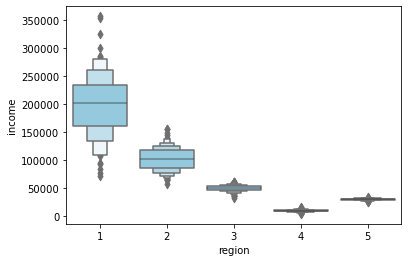

In [211]:
# 지역에 따른 소득 분포 확인 : by boxenplot
sns.boxenplot(x='region', y='income', data=customer, color='skyblue')

In [212]:
# cus_info = customer.describe()
# for key, group in cus_info:
#     print('* key :', key)
#     print('* number :', len(group))
#     print(group.head(),'\n')

In [224]:
# 고객 소득 데이터 이상치 처리
for i in range(1,6):
    cus_info = customer[customer.region == i].describe()
    Q1 = cus_info["income"]["25%"]
    Q3 = cus_info["income"]["75%"]
    IQR = Q3-Q1
    print(f'{i}지역 이상치')
    mask = (customer[customer.region == i].income <= (Q1 - IQR*1.5))|(customer[customer.region == i].income >= (Q3 + IQR*1.5))
    outlier = customer[customer.region == i][mask].income
    print(outlier)

# lower whisker 보다 작거나, upper whisker 보다 큰 값들을 이상치로 판정
# 1지역: 2개
# 2지역: 0개
# 3지역: 2개
# 4지역: 4개
# 5지역: 2개

# 위와 같이 이상치가 발생하였으나 분석 결과 사전에 설정한 가정에 영향이 없다고 판단되어 보정하지 않음 


1지역 이상치
45     353620
465    356843
Name: income, dtype: int64
2지역 이상치
Series([], Name: income, dtype: int64)
3지역 이상치
927    31822
961    35888
Name: income, dtype: int64
4지역 이상치
163    14804
689    16482
721    15349
995     4191
Name: income, dtype: int64
5지역 이상치
81     25607
838    25747
Name: income, dtype: int64


#### 연령 : age

In [248]:
# age = np.random.randint(7, 81, size=(1000))
# 1 지역 연령 데이터 생성
# age_1_old = np.random.normal(65, 6, 60).tolist()
# age_1_young = np.random.normal(24, 3, 40).tolist()
# age_1 = age_1_old + age_1_young
# customer.age[customer.region == 1] = age_1

# 2 지역 연령 데이터 생성
# age_2_old = np.random.normal(40, 3, 100).tolist()
# age_2_young = np.random.normal(5, 3, 50).tolist()
# age_2 = age_2_old + age_2_young
# customer.age[customer.region == 2] = age_2

# 3 지역 연령 데이터 생성
# customer.age[customer.region == 3] = age_3

# 4 지역 연령 데이터 생성
age_4 = np.random.randint(20, 28, size=300).tolist()
customer.age[customer.region == 4] = age_4

# 5 지역 연령 데이터 생성
# age_1_old = np.random.normal(60, 6, 60).tolist()
# age_1_young = np.random.normal(24, 3, 40).tolist()
# age_6 = age_1_old + age_1_young
# customer.age[customer.region == 5] = age_5

customer.age[customer.region == 4] = customer.age[customer.region == 4].map(lambda x: int(x))
customer.age[customer.region == 4].value_counts().sort_index()

ValueError: cannot assign mismatch length to masked array

#### 성별 : gender

In [ ]:
age_1_ = np.random.randint(1, 2, size=100).tolist()
age_2 = np.random.randint(2, 3, size=150).tolist()
age_3 = np.random.randint(3, 4, size=300).tolist()
age_4 = np.random.randint(4, 5, size=200).tolist()
age_5 = np.random.randint(5, 6, size=250).tolist()
gender = np.random.randint(0, 2, size=(1000))
gender = pd.Series(gender)

In [34]:
# 고객 번호
cusno = np.arange(10000, 11000)
cusno = pd.Series(cusno)

# 거주 지역
# region = np.random.randint(1, 6, size=(1000))
a = np.random.randint(1, 2, size=100).tolist()
b = np.random.randint(2, 3, size=150).tolist()
c = np.random.randint(3, 4, size=300).tolist()
d = np.random.randint(4, 5, size=200).tolist()
e = np.random.randint(5, 6, size=250).tolist()
li = a+b+c+d+e
random.shuffle(li)
region = li
region = pd.Series(region)

# 성별
gender = np.random.randint(0, 2, size=(1000))
gender = pd.Series(gender)

# 연령
# age = np.random.randint(7, 81, size=(1000))
age = []
age = pd.Series(age)

# 소득
# income = np.random.randint(10000, 1000000, size=(1000))\
income = []
income = pd.Series(income)

# 회원 등급
grade_20 = []
grade_20 = pd.Series(grade_20)

grade_21 = []
grade_21 = pd.Series(grade_21)

# ARPPU: Average Revenue Per Paying User : 구매 회당 평균 결제액
ARPPU_20 = []
ARPPU_20 = pd.Series(ARPPU_20)
ARPPU_21 = []
ARPPU_21 = pd.Series(ARPPU_21)

# AVC: Annual Visits by Customer : 고객별 연간 방문 획수
AVC_20 = []
AVC_20 = pd.Series(AVC_20)
AVC_21 = []
AVC_21 = pd.Series(AVC_21)

# ASC: Annual Sale by Customer : 고객별 연간 매출액
ASC_20 = (ARPPU_20 * AVC_20)
ASC_20 = pd.Series(ASC_20)
ASC_21 = (ARPPU_21 * AVC_20)
ASC_21 = pd.Series(ASC_21)
customer = pd.concat([cusno, gender, age, region, income, grade_20,
                     grade_21, ARPPU_20, ARPPU_21, AVC_20, AVC_21, ASC_20, ASC_21], axis=1)
customer.columns = ['cusno', 'gender', 'age', 'region', 'income', 'grade_20',
                    'grade_21', 'ARPPU_20', 'ARPPU_21', 'AVC_20', 'AVC_21', 'ASC_20', 'ASC_21']
# customer.set_index('index', drop=True)
customer

,cusno,gender,age,region,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21
0,10000,1,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10002,1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10003,1,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10004,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,0,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,10996,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,10997,0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,10998,1,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 상품 목록 만들기

In [29]:
# 상품 정보

# 상품 코드
product_num = np.arange(1, 101)
product_num = pd.Series(product_num)

price = random.sample(list(range(1000, 100000)), 100)
price = pd.Series(price)

price_grade = []
price_grade = pd.Series(price_grade)

product = pd.concat([product_num, price, price_grade], axis=1)
product.columns = ['product_num', 'price', 'price_grade']

product = product.set_index('product_num')

product

,price,price_grade
product_num,,
1,50029,NaN
2,28274,NaN
3,78687,NaN
4,90499,NaN
5,57515,NaN
...,...,...
96,75232,NaN
97,4842,NaN
98,52177,NaN


### price_garde 범주화

In [30]:
# price_grade : 고가품 : 1, 중가품 : 2, 저가품 : 3

def price_grade(x):
    y = 0
    if x <= 20000:
        y = '3'
    elif x <= 50000:
        y = '2'
    else:
        y = '1'
    return y


product['price_grade'] = product['price'].apply(price_grade)
product

,price,price_grade
product_num,,
1,50029,1
2,28274,2
3,78687,1
4,90499,1
5,57515,1
...,...,...
96,75232,1
97,4842,3
98,52177,1


## 거래 데이터 만들기

In [22]:
# 1. 거래 번호 만들기
ts_num = np.arange(0, 10000)
ts_num = pd.Series(ts_num)

# 2. 중복 cusno 만들기
# 기존 cusno가 중복될 수 있도록 만들기
ts_cusno = np.random.choice(list(cusno), size=10000)
ts_cusno = pd.Series(ts_cusno)

# 3. 수량
a = np.random.randint(1, 4, size=6500).tolist()
b = np.random.randint(4, 7, size=2500).tolist()
c = np.random.randint(7, 10, size=1000).tolist()
li = a+b+c
random.shuffle(li)
quantity = li
quantity = pd.Series(quantity)

# 4. 날짜
# date
date_list = list(pd.date_range('2020-01-01', '2021-12-31', freq='H'))
date = np.random.choice(date_list, size=10000)
date = pd.Series(date)

# day(요일)
day = date.map(lambda x: x.weekday())  # date별 요일을 숫자로 나타냄
day

# 시간
time = date.map(lambda x: x.hour)
time

purchase = pd.concat([ts_num, ts_cusno, quantity, date, time, day], axis=1)
purchase.columns = ['ts_num', 'ts_cusno', 'quantity', 'date', 'time', 'day']

purchase = purchase.set_index('ts_num')

purchase

,ts_cusno,quantity,date,time,day
ts_num,,,,,
0,10145,1,2020-03-03 14:00:00,14,1
1,10507,3,2020-09-22 19:00:00,19,1
2,10734,3,2021-06-17 12:00:00,12,3
3,10611,3,2021-04-28 19:00:00,19,2
4,10280,3,2020-12-31 17:00:00,17,3
...,...,...,...,...,...
9995,10820,3,2021-10-11 07:00:00,7,0
9996,10473,3,2021-07-08 08:00:00,8,3
9997,10509,2,2021-02-12 08:00:00,8,4


## DataFrame 확인

In [23]:
customer

,cusno,gender,age,region,income,grade_20,grade_21,ARPPU_20,ARPPU_21,AVC_20,AVC_21,ASC_20,ASC_21
0,10000,0,50,2,117,Silver,Silver,17650,36357,3,256,52950,109071
1,10001,0,62,4,132,Silver,Silver,24528,9357,21,10,515088,196497
2,10002,1,74,1,128,Gold,VIP,24391,45691,283,267,6902653,12930553
3,10003,0,48,1,96,Gold,Gold,46851,39701,197,20,9229647,7821097
4,10004,0,73,2,49,Silver,Silver,16667,1934,94,173,1566698,181796
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10995,1,27,1,129,VIP,Silver,43102,11863,281,92,12111662,3333503
996,10996,0,18,1,67,Silver,Gold,17427,46541,223,299,3886221,10378643
997,10997,1,72,5,44,Silver,Silver,33053,24545,47,324,1553491,1153615
998,10998,0,7,2,85,Silver,Silver,2040,25368,237,176,483480,6012216


In [24]:
product

,product_num,price,price_grade
0,1,51494,1
1,2,56125,1
2,3,6306,3
3,4,34936,2
4,5,68013,1
...,...,...,...
95,96,25100,2
96,97,25823,2
97,98,25475,2
98,99,5321,3


In [25]:
purchase

,ts_cusno,quantity,date,time,day
ts_num,,,,,
0,10145,1,2020-03-03 14:00:00,14,1
1,10507,3,2020-09-22 19:00:00,19,1
2,10734,3,2021-06-17 12:00:00,12,3
3,10611,3,2021-04-28 19:00:00,19,2
4,10280,3,2020-12-31 17:00:00,17,3
...,...,...,...,...,...
9995,10820,3,2021-10-11 07:00:00,7,0
9996,10473,3,2021-07-08 08:00:00,8,3
9997,10509,2,2021-02-12 08:00:00,8,4


## 데이터 가공

1. 소비 트랜드 만들기 
    - 1 지역 젊은 여상들의 고가품 소비 증가 경향
    - 5 지역 고령 남성들의 저가품 소비 증가 경향
    - 인당 평균 소비량 감소
    - 
       |지역|소득|컨셉|연령분포|소득시간|
       |-|-|-|-|-|
       | 1지역 | 2억 | 부촌 |고령 + 청년|일과시간 소비|
       | 2지역 | 1억 | 위성신도시 |신혼 부부 + 어린 자녀|오전,주말에 증가| 
       | 3지역 | 5천 | 직장가 |30~50대 생상가능인구|점심시간,저녁, 주말 전무| 
       | 4지역 | 1천 | 대학가 |20대|점심시간, 저녁, 주말 전무|
       | 5지역 | 3천 | 빈민가 |노년층|밤 늦게|
      - 소득은 정규분포로 데이터 입력

## 종속변수 처리

In [28]:
# 고객 등급 선정
bin_dividers = np.linspace(customer.ASC_20.min(), customer.ASC_20.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']  # qcut
customer['grade_20'] = pd.cut(x=customer.ASC_20,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부
bin_dividers = np.linspace(customer.ASC_21.min(), customer.ASC_21.max(), 4)
bin_names = ['Silver', 'Gold', 'VIP']
customer['grade_21'] = pd.cut(x=customer.ASC_21,  # 데이터 배열
                              bins=bin_dividers,  # 경계값 리스트
                              labels=bin_names,  # bin 이름
                              include_lowest=True)  # 첫 경계값 포함 여부

customer.head()

ValueError: Bin edges must be unique: array([nan, nan, nan, nan]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
# 거래당 평균 결제 금액
customer['ARPPU_20'] =